In [1]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf

In [4]:
df=yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-06-01,27218.412109,27346.105469,26671.720703,26819.972656,26819.972656,14678970415
2023-06-02,26824.556641,27303.861328,26574.644531,27249.589844,27249.589844,14837415000
2023-06-03,27252.324219,27317.052734,26958.003906,27075.128906,27075.128906,8385597470


In [7]:
pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


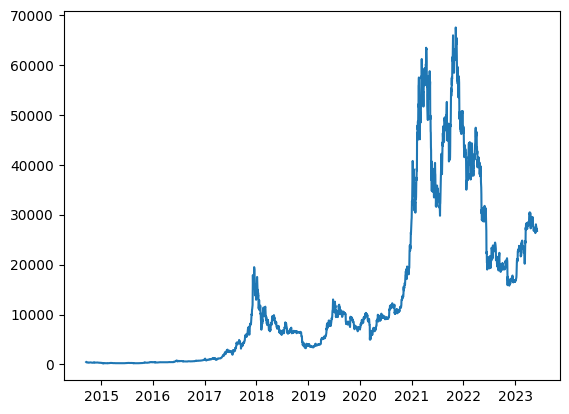

In [11]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [63]:
# Train test split
to_row =int(len(df)*0.8)
training_data=list(df[0:to_row]['Adj Close'])
testing_data=list(df[0:to_row]['Adj Close'])

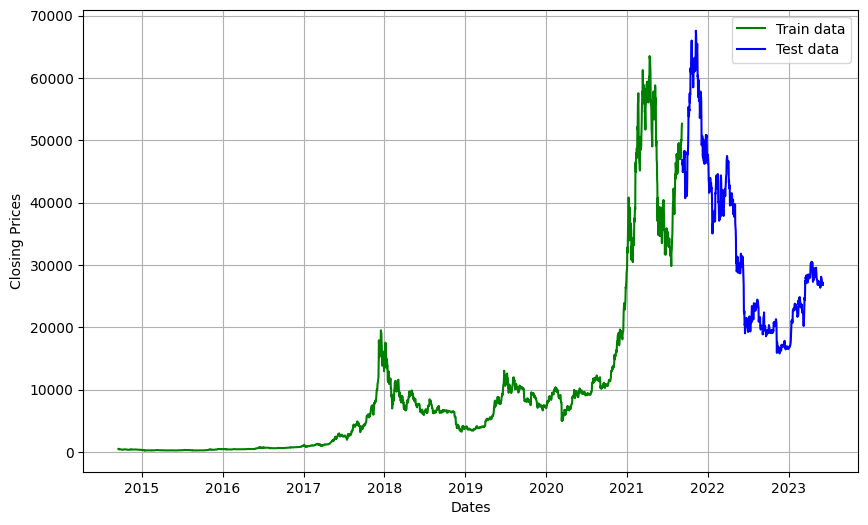

In [64]:
#split data into train and training dataset
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Test data')
plt.legend()

In [19]:
model_predictions=[]
n_test_obser=len(testing_data)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]  # Get the forecasted value directly
    model_predictions.append(yhat)
    actual_test_value=testing_data[i]
    training_data.append(actual_test_value)
    break


In [42]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3379
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -27532.385
Date:                Mon, 05 Jun 2023   AIC                          55074.769
Time:                        07:43:23   BIC                          55105.395
Sample:                             0   HQIC                         55085.719
                               - 3379                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0197      0.011     -1.879      0.060      -0.040       0.001
ar.L2          0.0057      0.010      0.569      0.569      -0.014       0.025
ar.L3          0.0073      0.011      0.687      0.4

In [45]:
len(testing_data)

2865

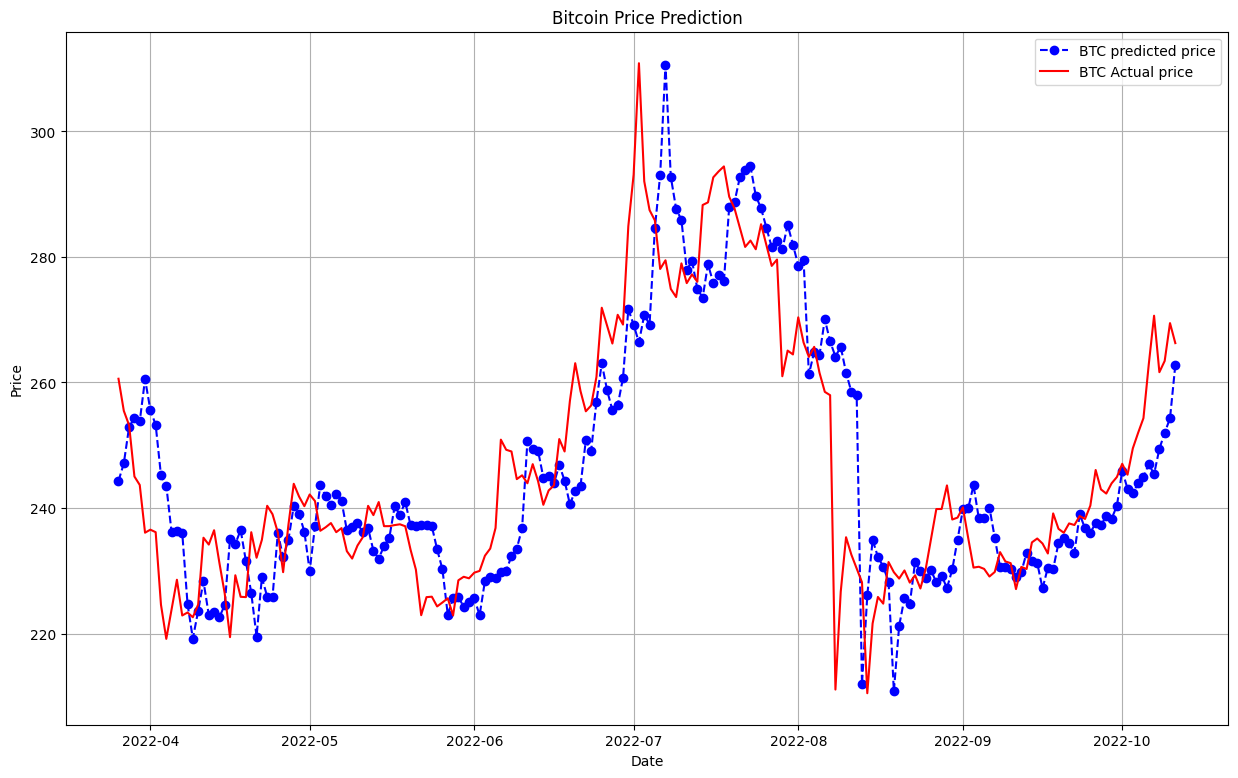

In [71]:

plt.figure(figsize=(15,9))
plt.grid(True)
date_range = df[to_row:].index

start_index = 200
end_index = 400

plt.plot(date_range[start_index:end_index], model_predictions[start_index:end_index], color='blue', marker='o', linestyle='dashed', label='BTC predicted price')
plt.plot(date_range[start_index:end_index], testing_data[start_index:end_index], color='red', label='BTC Actual price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



In [76]:
# report performance
mape = np.mean(np.abs(np.array(model_predictions[:-1]) - testing_data[:517])) / np.abs(testing_data[:517])
print('MAPE: ' + str(mape))# Mean Absolute Percentage Error
#Around 3.8% MAPE(Mean Absolute Percentage Error)implies the model is about 96.2% accurate in predicting the test set observation.

MAPE: [0.4276743  0.46081897 0.49542045 0.47832746 0.49042051 0.4863584
 0.44881609 0.46216376 0.47522439 0.48362493 0.4895625  0.51855742
 0.52092461 0.50547368 0.50986018 0.52147324 0.54404306 0.59474074
 0.61024617 0.59255512 0.5817893  0.55417353 0.53582486 0.5409584
 0.53985796 0.51668344 0.50098102 0.48791381 0.49544929 0.51127157
 0.50967018 0.49966537 0.50209734 0.51088562 0.50608708 0.5104683
 0.54570517 0.5458148  0.5632201  0.55141752 0.55409658 0.54692437
 0.58282256 0.56642681 0.57811959 0.60043165 0.60016818 0.59712296
 0.59181464 0.57613572 0.5599645  0.57120746 0.56612676 0.53842385
 0.53305317 0.53193544 0.46177529 0.46487697 0.49165701 0.52000226
 0.50425132 0.50486828 0.52129811 0.5139599  0.54658509 0.55747791
 0.55420492 0.53211201 0.51894266 0.52108979 0.53096074 0.52909351
 0.51956852 0.52089133 0.51736955 0.51573523 0.51293551 0.52155943
 0.52918801 0.51900737 0.52187255 0.52144125 0.54043975 0.55530795
 0.56469335 0.55802183 0.55479917 0.56304984 0.55623496 0.5